In [59]:
import json
import os 
import re 
import pandas as pd 

file_path = "./pubmed_search/pubmed_search_summary.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)
counts = [d['count'] for d in data['results']]

In [60]:
series = pd.Series(counts)
summary = series.describe()
summary

count    11074.000000
mean         0.662723
std          8.546563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        412.000000
dtype: float64

In [61]:
series.sum()

7339

In [62]:
count_greater_zero = sum(1 for count in counts if count > 0)
count_greater_zero

837

In [63]:
greater_zero = [count for count in counts if count > 0]

In [64]:
series = pd.Series(greater_zero)
summary = series.describe()
summary

count    837.000000
mean       8.768220
std       29.938674
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      412.000000
dtype: float64

In [65]:
series.sum()

7339

In [66]:
p_75 = series.quantile(0.75)
c_75 = (series > p_75).sum()
c_75

193

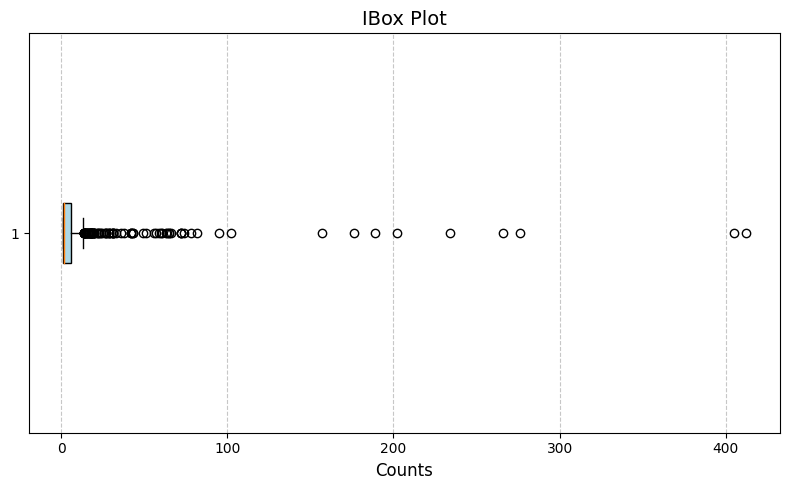

In [67]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 5))
plt.boxplot(series, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('IBox Plot', fontsize=14)
plt.xlabel('Counts', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

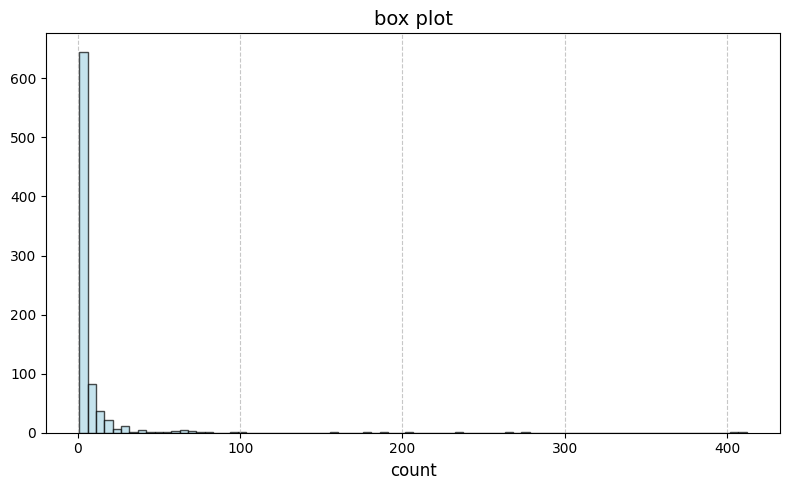

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(series, bins=80, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('box plot', fontsize=14)
plt.xlabel('count', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
filtered_series = series[series <= p_75]

In [70]:
remaining_count = filtered_series.sum()
remaining_count

1280

In [72]:
filtered_data = [d for d in data['results'] if d['count'] <= p_75]
filterd_counts = [d['count'] for d in filtered_data]
filterd_greater_zero = [count for count in filterd_counts if count > 0]
series = pd.Series(filterd_greater_zero)
summary = series.describe()
summary

count    644.000000
mean       1.987578
std        1.404226
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        6.000000
dtype: float64

In [75]:
total_count = sum(filterd_counts)
total_count

1280

In [76]:
final_output = {
    "total_count_sum": total_count, 
    "results": filtered_data
    
}

In [77]:
new = "./pubmed_search/pubmed_search_filtered.json"
with open(new, "w", encoding="utf-8") as file:
    json.dump(final_output, file, indent=4, ensure_ascii=False)